In [ ]:
import os

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mahenrakumar","key":"72c1c310c2abc969cda66ef462a0db7c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
base_dir = '/content/chest_xray'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training Normal pictures
train_normal_dir = os.path.join(train_dir, 'NORMAL')

# Directory with our training pneumonia pictures
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

# Directory with our validation normal pictures
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')

# Directory with our validation pneumonia pictures
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

# Directory with our test mormal pictures
test_normal_dir = os.path.join(test_dir, 'NORMAL')

# Directory with our validation pneumonia pictures
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

In [ ]:
train_normal_fnames = os.listdir(train_normal_dir)
print(train_normal_fnames[:10])

train_pneumonia_fnames = os.listdir(train_pneumonia_dir)
train_pneumonia_fnames.sort()
print(train_pneumonia_fnames[:10])

['NORMAL2-IM-0408-0001.jpeg', 'NORMAL2-IM-0506-0001.jpeg', 'NORMAL2-IM-1138-0001.jpeg', 'IM-0590-0001.jpeg', 'IM-0560-0001.jpeg', 'NORMAL2-IM-0851-0001-0002.jpeg', 'IM-0536-0001.jpeg', 'NORMAL2-IM-1052-0001.jpeg', 'IM-0245-0001.jpeg', 'IM-0575-0001.jpeg']
['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg', 'person1003_virus_1685.jpeg', 'person1004_bacteria_2935.jpeg', 'person1004_virus_1686.jpeg', 'person1005_bacteria_2936.jpeg', 'person1005_virus_1688.jpeg']


In [ ]:
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total validation pneumonia images:', len(os.listdir(validation_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))


total training normal images: 1341
total training pneumonia images: 3875
total validation normal images: 8
total validation pneumonia images: 8
total test normal images: 234
total test pneumonia images: 390


In [ ]:
# Note :
#-->   convnet takes as input tensors of shape (image_height, image_width, image_channels)
#  Flatten layers
#-->  It is a Flatten layer whose role is simply to convert each input image into a 1D array
#--> to feed the last output tensor (of shape (12, 12, 128)) into a densely
#     connected classifier network like those you’re already familiar with: a stack of Dense
#     layers. These classifiers process vectors, which are 1D, whereas the current output is a
#     3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',   
input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # Flatten is the function that converts the pooled feature map to a single column that is passed to the fully connected layer 
model.add(layers.Dense(128, activation='relu'))  # 128 no of neurons
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [ ]:
#     Hence we can see  12*12*1281832 --> 1d single column(1D array) (12, 12, 128) outputs are flattened into vectors of shape (18432,) called 1d array
#     before going through two Dense layers.

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/chest_xray/train'
testing_dir = '/content/chest_xray/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,           
                                   shear_range = 0.2,          
                                   zoom_range = 0.2,  
                                   horizontal_flip = True)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,                      
                                               target_size = (224, 224),      
                                               batch_size = 32,
                                               class_mode = 'binary') 

Found 5216 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [ ]:
test_data = test_datagen.flow_from_directory(testing_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:
history = model.fit(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
163/163 [==============================] - 593s 4s/step - loss: 0.3772 - acc: 0.8407 - val_loss: 0.4039 - val_acc: 0.8237
Epoch 2/10
163/163 [==============================] - 589s 4s/step - loss: 0.2396 - acc: 0.9043 - val_loss: 0.4523 - val_acc: 0.7821
Epoch 3/10
163/163 [==============================] - 588s 4s/step - loss: 0.2288 - acc: 0.9061 - val_loss: 0.3716 - val_acc: 0.8510
Epoch 4/10
163/163 [==============================] - 587s 4s/step - loss: 0.2164 - acc: 0.9137 - val_loss: 0.7395 - val_acc: 0.7484
Epoch 5/10
163/163 [==============================] - 588s 4s/step - loss: 0.1908 - acc: 0.9250 - val_loss: 0.3757 - val_acc: 0.8510
Epoch 6/10
163/163 [==============================] - 585s 4s/step - loss: 0.1680 - acc: 0.9342 - val_loss: 0.3896 - val_acc: 0.8429
Epoch 7/10
163/163 [==============================] - 587s 4s/step - loss: 0.1630 - acc: 0.9356 - val_loss: 0.3669 - val_acc: 0.8814
Epoch 8/10
163/163 [==============================] - 584s 4s/step - 

In [ ]:
model.save('Pneumonia Detection.h5')

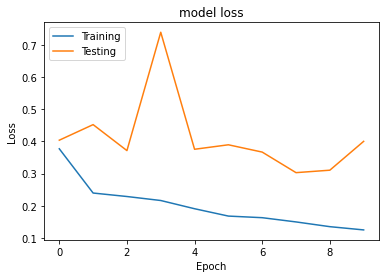

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

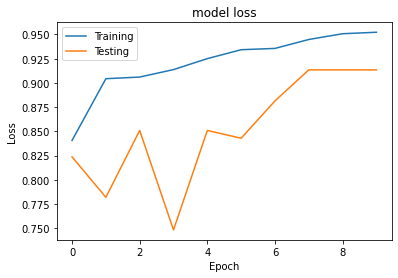

In [ ]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()